In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
#from keras.applications.xception import Xception
#tf.keras.applications.xception.preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
#tf.keras.applications.vgg16.preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
resnet = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top = False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Datasets/train/*') #training folders

In [6]:
folders

['Datasets/train\\Allion',
 'Datasets/train\\Caravan',
 'Datasets/train\\Hiace',
 'Datasets/train\\Premio',
 'Datasets/train\\Vezel']

In [7]:
x = Flatten()(resnet.output)

In [8]:
#setting the length of the folders as output using dense

In [9]:
prediction = Dense(len(folders), activation='softmax') (x) 

#creating the model object
model = Model(inputs = resnet.input, outputs = prediction)

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3772 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 101 images belonging to 5 classes.


In [14]:
r = model.fit(
training_set,
validation_data=test_set,
epochs=100,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

Epoch 1/100
118/118 [==============================] - 63s 404ms/step - loss: 1.0847 - accuracy: 0.5681 - val_loss: 0.7338 - val_accuracy: 0.7030
Epoch 2/100
118/118 [==============================] - 38s 322ms/step - loss: 0.5756 - accuracy: 0.7741 - val_loss: 0.5577 - val_accuracy: 0.7327
Epoch 3/100
118/118 [==============================] - 38s 324ms/step - loss: 0.4397 - accuracy: 0.8332 - val_loss: 0.7514 - val_accuracy: 0.6931
Epoch 4/100
118/118 [==============================] - 39s 325ms/step - loss: 0.3761 - accuracy: 0.8579 - val_loss: 0.5342 - val_accuracy: 0.8218
Epoch 5/100
118/118 [==============================] - 39s 329ms/step - loss: 0.3404 - accuracy: 0.8661 - val_loss: 0.5432 - val_accuracy: 0.8119
Epoch 6/100
118/118 [==============================] - 40s 334ms/step - loss: 0.3142 - accuracy: 0.8815 - val_loss: 0.3982 - val_accuracy: 0.8713
Epoch 7/100
118/118 [==============================] - 39s 330ms/step - loss: 0.2404 - accuracy: 0.9120 - val_loss: 0.4865 -

Epoch 57/100
118/118 [==============================] - 39s 328ms/step - loss: 0.0552 - accuracy: 0.9806 - val_loss: 0.8073 - val_accuracy: 0.8416
Epoch 58/100
118/118 [==============================] - 39s 329ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.7387 - val_accuracy: 0.8416
Epoch 59/100
118/118 [==============================] - 39s 332ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.7276 - val_accuracy: 0.8416
Epoch 60/100
118/118 [==============================] - 39s 330ms/step - loss: 0.0479 - accuracy: 0.9833 - val_loss: 0.5894 - val_accuracy: 0.8614
Epoch 61/100
118/118 [==============================] - 39s 330ms/step - loss: 0.1017 - accuracy: 0.9645 - val_loss: 0.7782 - val_accuracy: 0.8416
Epoch 62/100
118/118 [==============================] - 39s 327ms/step - loss: 0.0652 - accuracy: 0.9761 - val_loss: 0.7227 - val_accuracy: 0.8614
Epoch 63/100
118/118 [==============================] - 39s 328ms/step - loss: 0.0938 - accuracy: 0.9682 - val_loss: 0

In [15]:
from tensorflow.keras.models import load_model

model.save('modelV9.h5')

#model = load_model('modelV3.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[1.44463990e-13, 6.11129310e-03, 9.93888736e-01, 3.93455997e-11,
        1.76297891e-16],
       [2.05642791e-04, 9.10091694e-06, 4.13134327e-09, 9.93474275e-02,
        9.00437772e-01],
       [2.88878557e-08, 2.23389929e-04, 9.99776542e-01, 8.27868796e-09,
        2.81931661e-12],
       [3.24602850e-04, 2.33050068e-09, 4.98764393e-07, 9.99021292e-01,
        6.53624185e-04],
       [2.97148836e-05, 2.94208126e-12, 4.45308894e-11, 9.99970317e-01,
        1.09569853e-10],
       [2.92166053e-12, 9.99909759e-01, 9.01895182e-05, 1.17340664e-12,
        4.79224679e-14],
       [1.29265876e-10, 3.95952142e-08, 1.00000000e+00, 1.03118469e-15,
        2.04469809e-11],
       [2.27972846e-17, 9.99972105e-01, 2.78853295e-05, 1.93547205e-08,
        7.01514194e-12],
       [1.09412167e-11, 4.59659368e-01, 5.40338635e-01, 1.99450415e-06,
        5.22344537e-12],
       [2.31433492e-12, 4.12022061e-08, 1.00000000e+00, 2.21543517e-14,
        1.90700222e-19],
       [4.35800274e-07, 9.2508

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 4, 2, 3, 3, 1, 2, 1, 2, 2, 3, 2, 4, 4, 1, 1, 4, 2, 2, 2, 0, 1,
       0, 3, 1, 1, 3, 4, 4, 2, 1, 3, 0, 2, 3, 2, 1, 3, 0, 2, 3, 1, 3, 3,
       4, 3, 1, 1, 3, 4, 2, 1, 4, 3, 3, 3, 0, 4, 0, 4, 0, 3, 3, 4, 4, 4,
       3, 4, 4, 1, 3, 1, 2, 2, 3, 4, 0, 4, 1, 2, 1, 1, 3, 2, 1, 0, 1, 1,
       2, 4, 3, 3, 0, 4, 4, 3, 1, 3, 3], dtype=int64)

In [20]:
#img = image.load_img('Test/ferrari/00701.jpg', target_size=(224,224))

In [21]:
#x = image.img_to_array(img)

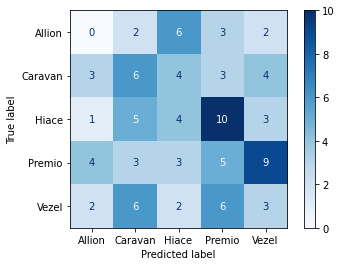

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Allion", "Caravan", "Hiace", "Premio", "Vezel"]
cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
x.shape

In [ ]:
x = x / 255

In [ ]:
x

In [ ]:
#x = np.expand_dims(x, axis = 0)
#img_data = preprocess_input(x)
#img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a = np.argmax(model.predict(img_data), axis=1)

In [ ]:
a